# Table Extractor

Table Extracter is used for extracting data from images. For example we want to extarct data from the image containing table so by this extracter we can extract data from image and save it in an excel sheet.

Here we go ::::::

### Import necessary Libraries 

In [69]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

### Read Image, Thresholding, Inverting 

In [71]:
cd C:\Users\Sunshine\Downloads\Compressed\Table-Extracter\Detect-Test

C:\Users\Sunshine\Downloads\Compressed\Table-Extracter\Detect-Test


(699, 2001)


True

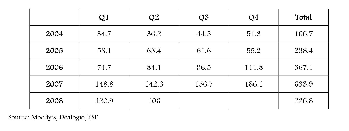

In [72]:
import re

# Read Image
file=r'Test.jpg'
img = cv2.imread(file,0)
print(img.shape)
plt.imshow(img, cmap = 'gray')
plt.axis('off')

# Thresholding Process i.e to convert the input image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)

# Inverting it to get a black background and white lines and fonts.
# Save it in system for furthur usage
img_bin = 255-img_bin
cv2.imwrite(r'cv_inverted.png',img_bin)

### Plotting Results

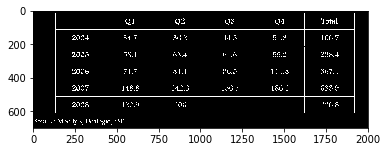

In [73]:
# Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

In [74]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100

# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))

# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))

# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

### Detecting Vertical Lines by vertical Kernel.

In [75]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite(r"vertical.jpg",vertical_lines)

True

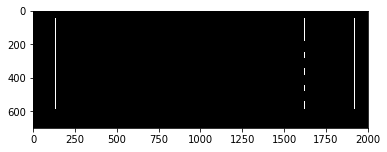

In [76]:
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

### Detecting Horizontal Lines by horizontal kernel.

In [77]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite(r"horizontal.jpg",horizontal_lines)


True

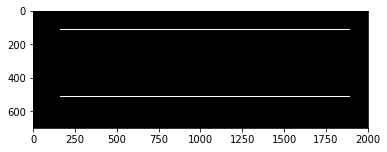

In [78]:
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

### Combining Both results into one image 

In [79]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)

#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite(r"img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)

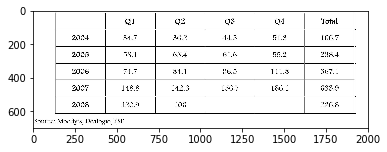

In [80]:
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [81]:
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [82]:
def sort_contours(cnts, method="left-to-right"):
    
    
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

In [83]:
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
#Get mean of heights
mean = np.mean(heights)

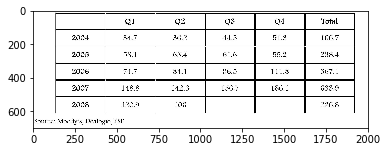

In [84]:
#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.show()

In [85]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0
#Sorting the boxes to their respective row and column
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
print(column)
print(row)

[[1626, 514, 294, 96], [1328, 514, 293, 96], [1030, 514, 294, 96], [733, 514, 293, 96], [435, 514, 294, 96], [138, 514, 293, 96]]
[[[1626, 14, 294, 96], [1328, 14, 294, 96], [1030, 14, 294, 96], [733, 14, 293, 96], [435, 14, 294, 96], [138, 14, 293, 96]], [[1626, 114, 294, 96], [1328, 114, 293, 96], [1030, 114, 294, 96], [733, 114, 293, 96], [435, 114, 294, 96], [138, 114, 293, 96]], [[1626, 214, 294, 96], [1328, 214, 294, 96], [1030, 214, 294, 96], [733, 214, 293, 96], [435, 214, 294, 96], [138, 214, 293, 96]], [[1626, 314, 294, 96], [1328, 314, 293, 96], [1030, 314, 294, 96], [733, 314, 293, 96], [435, 314, 294, 96], [138, 314, 293, 96]], [[1626, 414, 294, 96], [1328, 414, 293, 96], [1030, 414, 294, 96], [733, 414, 293, 96], [435, 414, 294, 96], [138, 414, 293, 96]], [[1626, 514, 294, 96], [1328, 514, 293, 96], [1030, 514, 294, 96], [733, 514, 293, 96], [435, 514, 294, 96], [138, 514, 293, 96]]]


In [86]:
#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

In [87]:
#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

In [88]:
#Regarding the distance to the columns center, the boxes are arranged in respective order
finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

In [89]:
#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)

                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

In [90]:
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")
#Converting it in a excel-file
data.to_excel("test.xlsx")

          0           1          2       3          4          5
0                QI\n      Q2\n   Q3\n      Q4\n   Total\n
1   2004\n                                         166.7\n
2   2005\n               63.4\n           00.2\n   238.4\n
3   2006\n     74.7\n    84.1\n          111.8\n   367.1\n
4   2007\n   1438.8\n   142.3\n          186.1\n          
5   2008\n    120.9\n     106\n                    226.8\n


In [91]:
dataframe

,0,1,2,3,4,5
0,,QI\n,Q2\n,Q3\n,Q4\n,Total\n
1,2004\n,,,,,166.7\n
2,2005\n,,63.4\n,,00.2\n,238.4\n
3,2006\n,74.7\n,84.1\n,,111.8\n,367.1\n
4,2007\n,1438.8\n,142.3\n,,186.1\n,
5,2008\n,120.9\n,106\n,,,226.8\n


In [68]:
dataframe.replace('\n', ' ')

,0,1,2,3
0,"ZOoT\n\n208\nWhaowty""s, Deady\n\n0 50 100 150...",,,
